<a href="https://colab.research.google.com/github/INFINITY-RUBER/Machine_Learning_A-Z_Hands-On-Python-R-In-Data-Science/blob/master/Part%202%20-%20Regression/Section%206%20-%20Polynomial%20Regression/Python/polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polynomial Regression

## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [3]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values# dolo tomo de la segunda columna (value)
y = dataset.iloc[:, -1].values

In [4]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [5]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


## Training the Linear Regression model on the whole dataset
(Entrenamiento del modelo de regresión lineal en todo el conjunto de datos)

In [6]:
from sklearn.linear_model import LinearRegression 
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Training the Polynomial Regression model on the whole dataset
(Entrenaminto del modelo de regresión polinómica en todo el conjunto de datos)

In [12]:
# cargamos libreria PolynomialFeatures 
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X)# funcio polinomial
lin_reg_2 = LinearRegression()# objeto regresion lineal 
lin_reg_2.fit(X_poly, y) #crea la funcion polineal

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Visualising the Linear Regression results
(Visualizando los resultados de la regresión lineal)

In [9]:
plt.style.use('fivethirtyeight')
#plt.style.use('dark_background')

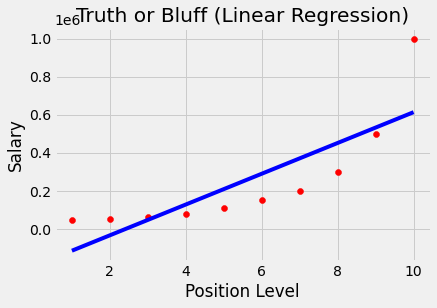

In [10]:

plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Visualising the Polynomial Regression results
(Visualizando los resultados de la regresión polinómica)

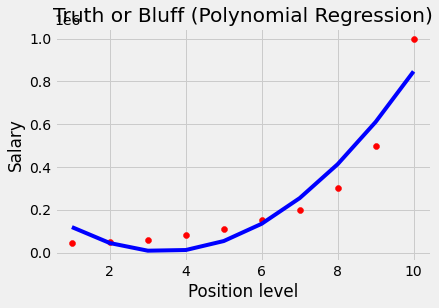

In [13]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [14]:
# cargamos libreria PolynomialFeatures 
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)# funcio polinomial
lin_reg_2 = LinearRegression()# objeto regresion lineal 
lin_reg_2.fit(X_poly, y) #crea la funcion polineal

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

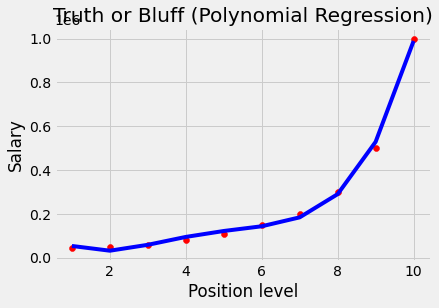

In [15]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Visualising the Polynomial Regression results (for higher resolution and smoother curve)

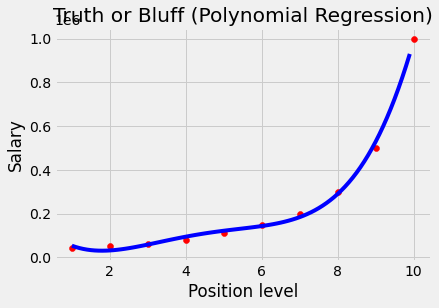

In [16]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Predicting a new result with Linear Regression
(Predecir un nuevo resultado con regresión lineal)

In [17]:
lin_reg.predict([[6.5]])

array([330378.78787879])

## Predicting a new result with Polynomial Regression
Predecir un nuevo resultado con regresión polinómica

In [18]:
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

array([158862.45265155])

# Polynomial Regression en R

In [20]:
import rpy2.robjects as ro
%load_ext rpy2.ipython

/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex
/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:34: UserWarning: pandas >= 1.0 is not supported.
  warnings.warn('pandas >= 1.0 is not supported.')


In [23]:
%%R
dataset = read.csv('Position_Salaries.csv')
dataset = dataset[2:3]
dataset

   Level  Salary
1      1   45000
2      2   50000
3      3   60000
4      4   80000
5      5  110000
6      6  150000
7      7  200000
8      8  300000
9      9  500000
10    10 1000000


In [24]:
%%R
# # install.packages('caTools')
# library(caTools)
# set.seed(123)
# split = sample.split(dataset$Salary, SplitRatio = 2/3)
# training_set = subset(dataset, split == TRUE)
# test_set = subset(dataset, split == FALSE)

# Feature Scaling
# training_set = scale(training_set)
# test_set = scale(test_set)

# Fitting Linear Regression to the dataset
lin_reg = lm(formula = Salary ~ .,
             data = dataset)


In [26]:
%%R
dataset$Level2 = dataset$Level^2
poly_reg = lm(formula = Salary ~ .,
              data = dataset)

dataset

   Level  Salary Level2
1      1   45000      1
2      2   50000      4
3      3   60000      9
4      4   80000     16
5      5  110000     25
6      6  150000     36
7      7  200000     49
8      8  300000     64
9      9  500000     81
10    10 1000000    100


In [30]:
%%R
# Fitting Polynomial Regression to the dataset
dataset$Level2 = dataset$Level^2
dataset$Level3 = dataset$Level^3
dataset$Level4 = dataset$Level^4
poly_reg = lm(formula = Salary ~ .,
              data = dataset)

In [ ]:
%%R
install.packages('ggplot2')

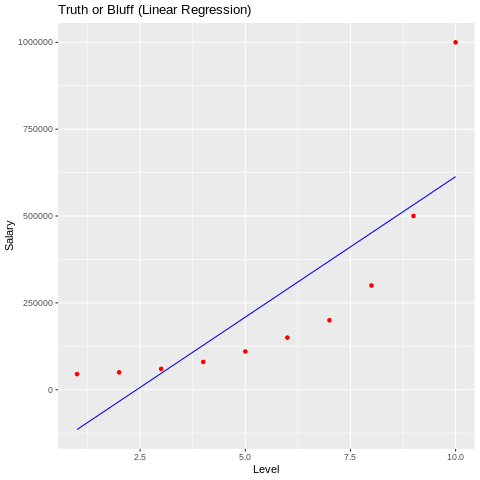

In [31]:
%%R
library(ggplot2)
ggplot() +
  geom_point(aes(x = dataset$Level, y = dataset$Salary),
             colour = 'red') +
  geom_line(aes(x = dataset$Level, y = predict(lin_reg, newdata = dataset)),
            colour = 'blue') +
  ggtitle('Truth or Bluff (Linear Regression)') +
  xlab('Level') +
  ylab('Salary')

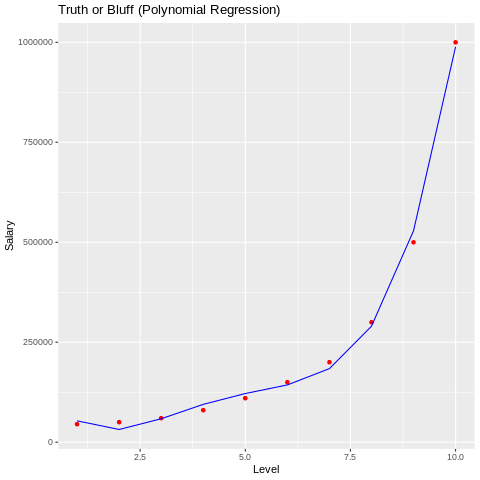

In [33]:
%%R
# Visualising the Polynomial Regression results
# install.packages('ggplot2')
ggplot() +
  geom_point(aes(x = dataset$Level, y = dataset$Salary),
             colour = 'red') +
  geom_line(aes(x = dataset$Level, y = predict(poly_reg, newdata = dataset)),
            colour = 'blue') +
  ggtitle('Truth or Bluff (Polynomial Regression)') +
  xlab('Level') +
  ylab('Salary')

In [35]:
%%R
# Predicting a new result with Linear Regression
predict(lin_reg, data.frame(Level = 6.5))

       1 
330378.8 


In [36]:
%%R
# Predicting a new result with Polynomial Regression
predict(poly_reg, data.frame(Level = 6.5,
                             Level2 = 6.5^2,
                             Level3 = 6.5^3,
                             Level4 = 6.5^4))

       1 
158862.5 


In [ ]:
#***************todo el codigo en R*************************
# Importing the dataset
dataset = read.csv('Position_Salaries.csv')
dataset = dataset[2:3]

# Splitting the dataset into the Training set and Test set
  # # install.packages('caTools')
  # library(caTools)
  # set.seed(123)
  # split = sample.split(dataset$Salary, SplitRatio = 2/3)
  # training_set = subset(dataset, split == TRUE)
  # test_set = subset(dataset, split == FALSE)
  
  # Feature Scaling
  # training_set = scale(training_set)
  # test_set = scale(test_set)

  # Fitting Linear Regression to the dataset
  lin_reg = lm(formula = Salary ~ .,
               data = dataset)

  # Fitting Polynomial Regression to the dataset
  dataset$Level2 = dataset$Level^2
  dataset$Level3 = dataset$Level^3
  dataset$Level4 = dataset$Level^4
  poly_reg = lm(formula = Salary ~ .,
                data = dataset)

# Visualising the Linear Regression results
# install.packages('ggplot2')
  library(ggplot2)
  ggplot() +
    geom_point(aes(x = dataset$Level, y = dataset$Salary),
               colour = 'red') +
    geom_line(aes(x = dataset$Level, y = predict(lin_reg, newdata = dataset)),
              colour = 'blue') +
    ggtitle('Truth or Bluff (Linear Regression)') +
    xlab('Level') +
    ylab('Salary')

  # Visualising the Polynomial Regression results
  # install.packages('ggplot2')
  library(ggplot2)
  ggplot() +
    geom_point(aes(x = dataset$Level, y = dataset$Salary),
               colour = 'red') +
    geom_line(aes(x = dataset$Level, y = predict(poly_reg, newdata = dataset)),
              colour = 'blue') +
    ggtitle('Truth or Bluff (Polynomial Regression)') +
    xlab('Level') +
    ylab('Salary')

# Visualising the Regression Model results (for higher resolution and smoother curve)
# install.packages('ggplot2')
library(ggplot2)
x_grid = seq(min(dataset$Level), max(dataset$Level), 0.1)
ggplot() +
  geom_point(aes(x = dataset$Level, y = dataset$Salary),
             colour = 'red') +
  geom_line(aes(x = x_grid, y = predict(poly_reg,
                                        newdata = data.frame(Level = x_grid,
                                                             Level2 = x_grid^2,
                                                             Level3 = x_grid^3,
                                                             Level4 = x_grid^4))),
            colour = 'blue') +
  ggtitle('Truth or Bluff (Polynomial Regression)') +
  xlab('Level') +
  ylab('Salary')

# Predicting a new result with Linear Regression
predict(lin_reg, data.frame(Level = 6.5))

  # Predicting a new result with Polynomial Regression
  predict(poly_reg, data.frame(Level = 6.5,
                               Level2 = 6.5^2,
                               Level3 = 6.5^3,
                               Level4 = 6.5^4))